# Vehicle Insurance Interest Response Classification

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

## Problem Statement 

**An insurance company has provided Health Insurance to its customers now they want a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.**

## Data

|Variable|Definition|
|-----|-----|
|id	|Unique ID for the customer|
|Gender	|Gender of the customer|
|Age	|Age of the customer|
|Driving_License	|0 : Customer does not have DL, 1 : Customer already has DL|
|Region_Code	|Unique code for the region of the customer|
|Previously_Insured	|1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance|
|Vehicle_Age	|Age of the Vehicle|
|Vehicle_Damage	|1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.|
|Annual_Premium	|The amount customer needs to pay as premium in the year|
|PolicySalesChannel	|Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.|
|Vintage	|Number of Days, Customer has been associated with the company|
|Response	|1 : Customer is interested, 0 : Customer is not interested|

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [3]:
data = pd.read_csv('../data/data.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Summary of the data


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
data.shape

(381109, 12)

In [7]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
def convert_to_str(val):
    if isinstance(val,float):
        return(str(int(val)))
    elif isinstance(val,int):
        return(str(val))
    else:
        return val

In [10]:
for col in ['Region_Code','Policy_Sales_Channel']:
    data[col] = data[col].map(convert_to_str)

In [11]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code              object
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel     object
Vintage                   int64
Response                  int64
dtype: object

In [12]:
data.drop(['id','Driving_License','Previously_Insured','Response'],axis =1).describe().round(2)

,Age,Annual_Premium,Vintage
count,381109.00,381109.00,381109.00
mean,38.82,30564.39,154.35
std,15.51,17213.16,83.67
min,20.00,2630.00,10.00
25%,25.00,24405.00,82.00
50%,36.00,31669.00,154.00
75%,49.00,39400.00,227.00
max,85.00,540165.00,299.00


In [13]:
data.describe(exclude = np.number)

,Gender,Region_Code,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
count,381109,381109,381109,381109,381109
unique,2,53,3,2,155
top,Male,28,1-2 Year,Yes,152
freq,206089,106415,200316,192413,134784


## Univariate analysis

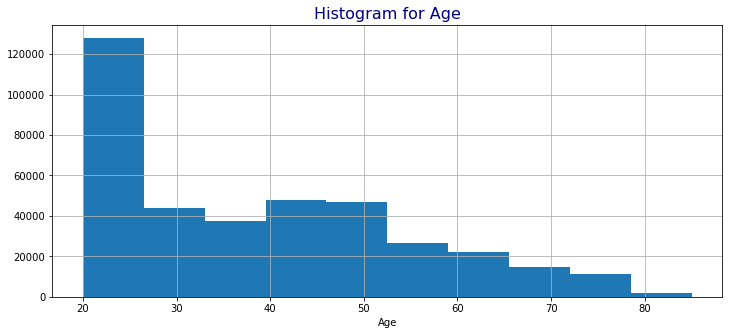

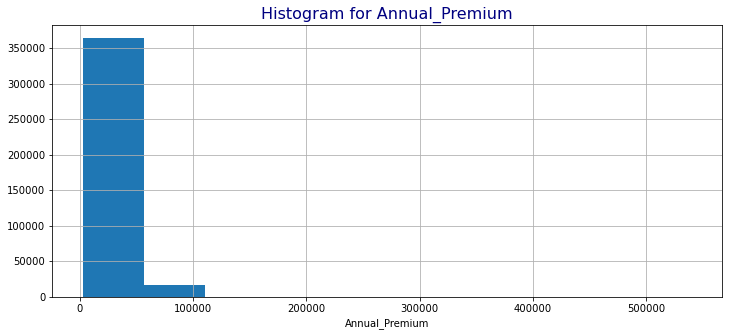

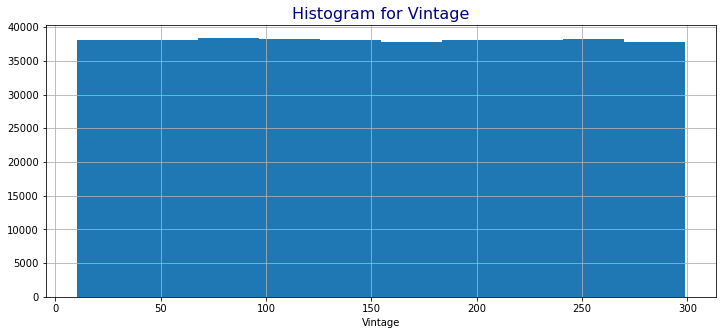

In [14]:
for col in ['Age','Annual_Premium','Vintage']:
    fig = plt.figure(figsize = (12,5))
    data[col].hist()
    # plt.hist(data[col])
    plt.title(f"Histogram for {col}", fontsize = 16, color = 'navy')
    plt.xlabel(col)
    plt.show()

In [15]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


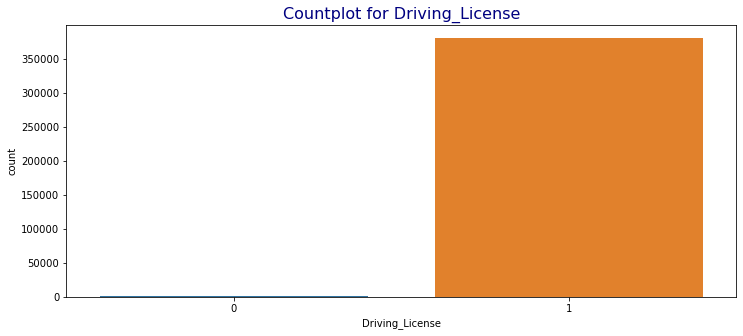

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


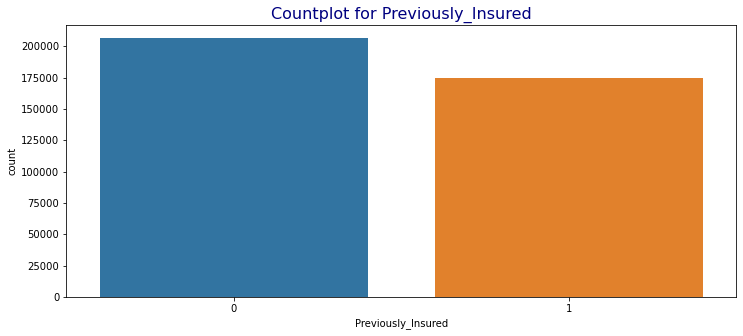

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


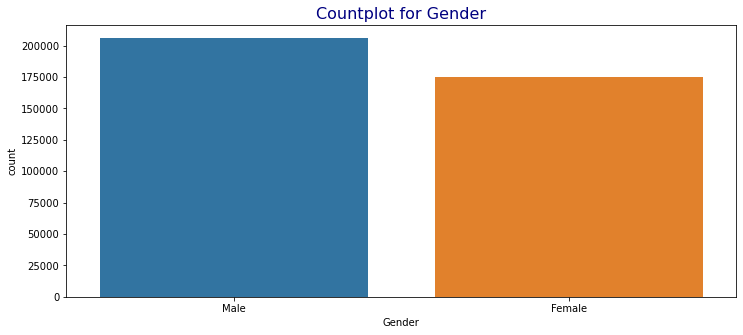

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


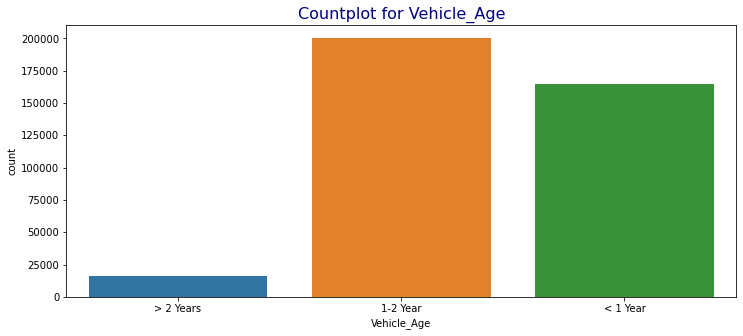

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


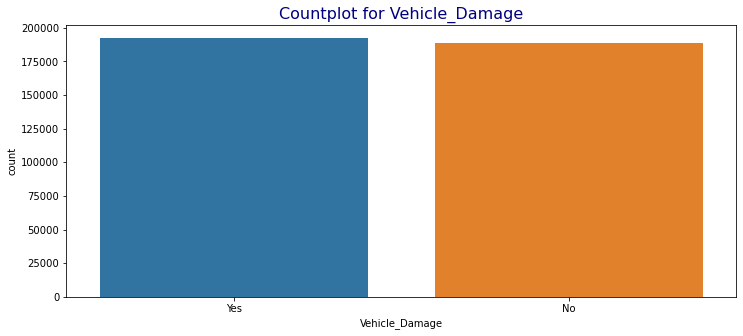

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


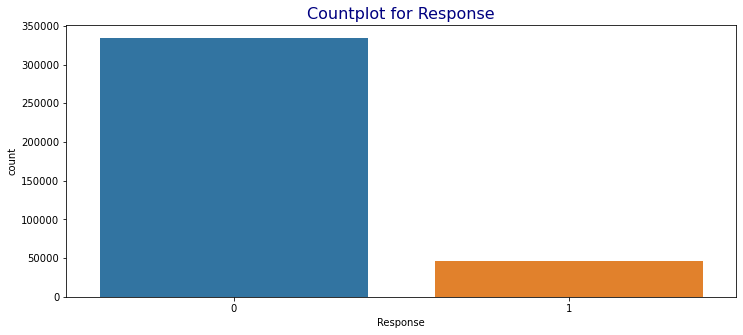

In [16]:
for col in [ 'Driving_License','Previously_Insured','Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Response']:
    fig = plt.figure(figsize = (12,5))
    sns.countplot(data[col])
    plt.title(f"Countplot for {col}", fontsize = 16, color = 'navy')
    plt.xlabel(col)
    plt.show()

## Get a count of the target variable and note down your observations

In [17]:
print(data['Response'].value_counts())
data['Response'].value_counts(normalize = True).round(2)*100

0    334399
1     46710
Name: Response, dtype: int64


0    88.0
1    12.0
Name: Response, dtype: float64

## What is the ratio of male and female in our dataset?

In [18]:
data['Gender'].value_counts(normalize = True).round(2)*100

Male      54.0
Female    46.0
Name: Gender, dtype: float64

## What is the ratio of male and female in our dataset?

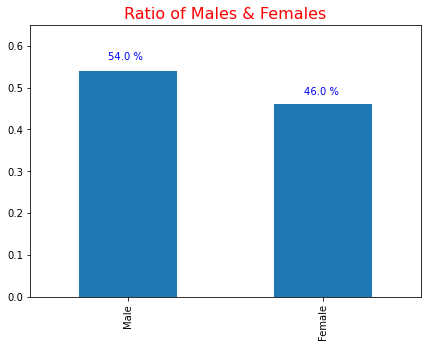

In [19]:
data['Gender'].value_counts(normalize = True).round(2).plot(kind = 'bar', figsize = (7,5))
for num, val in enumerate(data['Gender'].value_counts(normalize=True).round(2)):
    plt.text(x=num-0.1, y=val*1.05, s=str(val*100) + ' %', color='blue')
plt.ylim(0, 0.65)
plt.title('Ratio of Males & Females', fontsize=16, color='red')
plt.show()

## Check the gender ratio in the interested customers, what are your observations?

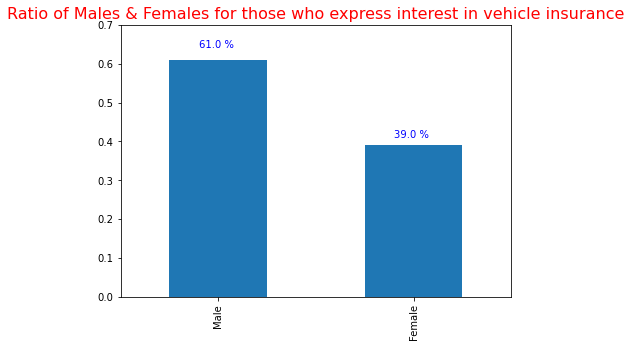

In [20]:
data[data['Response']== 1]['Gender'].value_counts(normalize = True).round(2).plot(kind = 'bar', figsize = (7,5))
for num, val in enumerate(data[data['Response']== 1]['Gender'].value_counts(normalize=True).round(2)):
    plt.text(x=num-0.1, y=val*1.05, s=str(val*100) + ' %', color='blue')
plt.ylim(0, 0.7)
plt.title('Ratio of Males & Females for those who express interest in vehicle insurance', fontsize=16, color='red')
plt.show()

## Find out the distribution of customers age

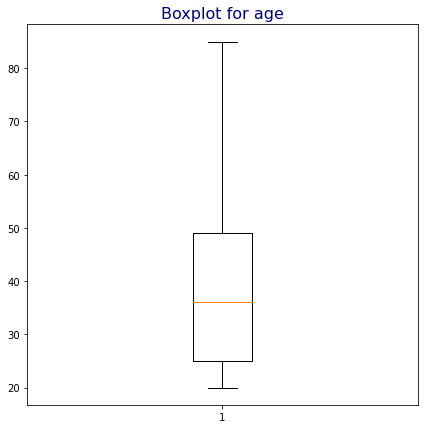

In [21]:
fig = plt.figure(figsize = (7,7))
plt.boxplot(data['Age'])
plt.title('Boxplot for age', color = 'navy', fontsize = 16)
plt.show()

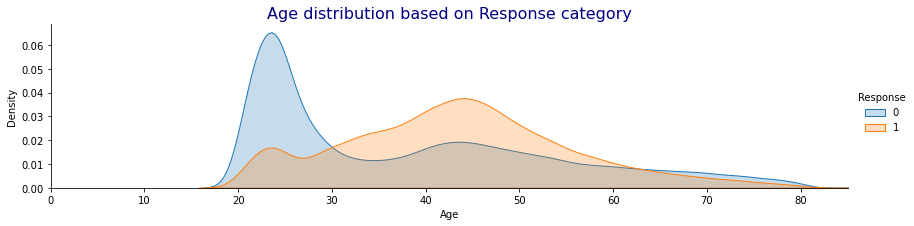

In [22]:
# Age distribution wrt Response

facetgrid = sns.FacetGrid(data,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,data["Age"].max()))
facetgrid.add_legend()
plt.title("Age distribution based on Response category", fontsize=16, color='navy')
plt.show()


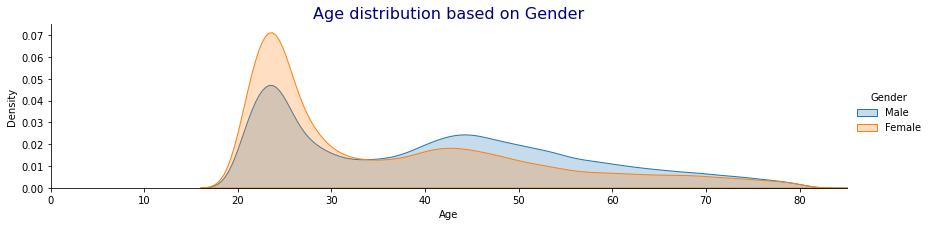

In [23]:
# Age distribution wrt Gender

facetgrid = sns.FacetGrid(data,hue="Gender",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,data["Age"].max()))
facetgrid.add_legend()
plt.title("Age distribution based on Gender", fontsize=16, color='navy')
plt.show()

## Which regions have people applied from more?

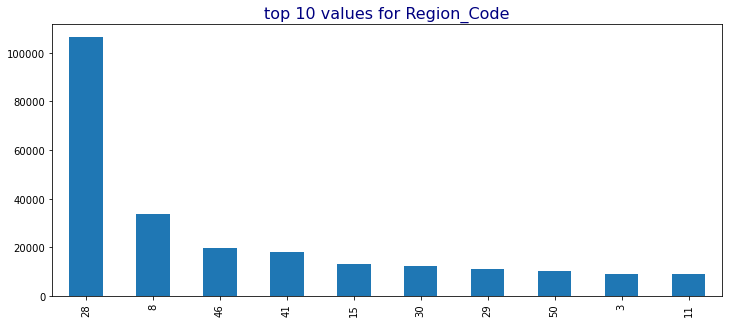

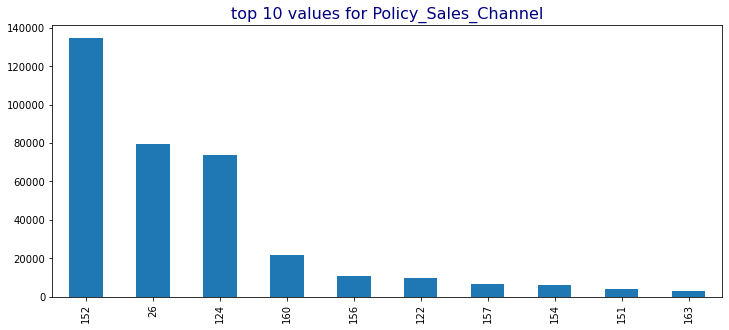

In [24]:
for col in ['Region_Code','Policy_Sales_Channel']:
    data[col].value_counts()[:10].plot(kind = 'bar', figsize = (12,5))
    plt.title(f"top 10 values for {col}", color = 'navy', fontsize = 16)
    plt.show()

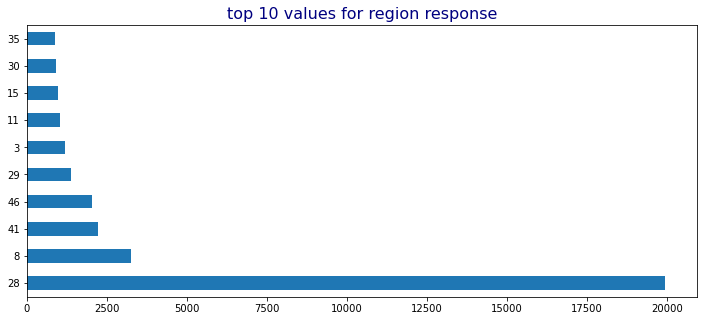

In [25]:
data[data['Response']== 1]['Region_Code'].value_counts()[:10].plot(kind = 'barh', figsize = (12,5))
plt.title(f"top 10 values for region response", color = 'navy', fontsize = 16)
plt.show()

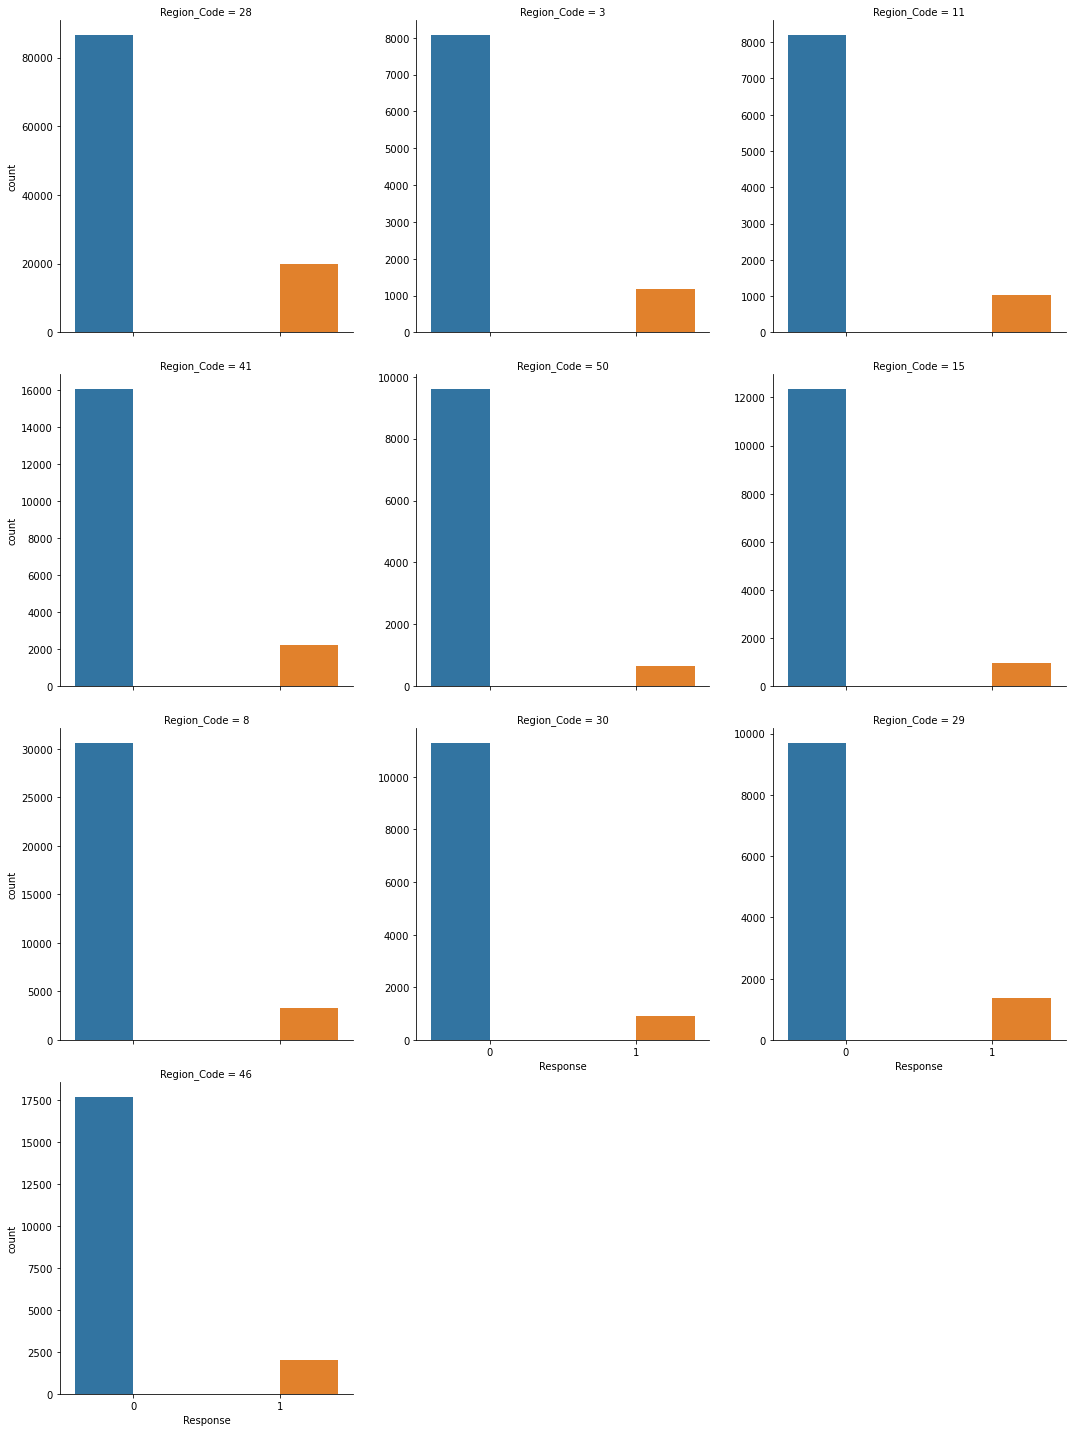

In [26]:
top_10_regs = data['Region_Code'].value_counts()[:10].index

top_10_data = data[data['Region_Code'].isin(top_10_regs)]

sns.catplot(x="Response", hue="Response", data=top_10_data, kind='count', col="Region_Code", col_wrap=3, sharey=False)

plt.show()

## Check the ratio of previously insured, note down your observations

In [27]:
data['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [28]:
pd.crosstab(data['Response'], data['Previously_Insured'], normalize = True).round(2)

Previously_Insured,0,1
Response,,
0,0.42,0.46
1,0.12,0.00


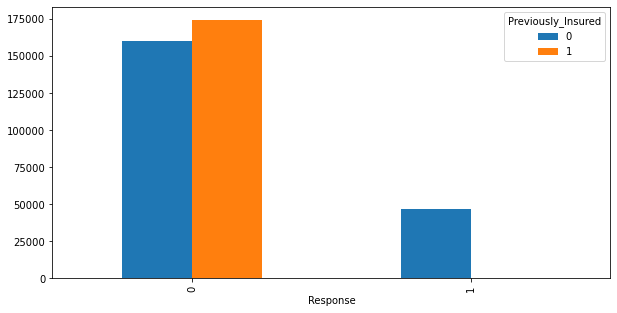

In [30]:
pd.crosstab(data['Response'], data['Previously_Insured']).plot(kind = 'bar', figsize = (10,5))
plt.show()

## How old are most of the vehicles? Does vehicle damage has any effect on the Response variable?

In [31]:
data['Vehicle_Age'].value_counts(normalize= True)

1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: Vehicle_Age, dtype: float64

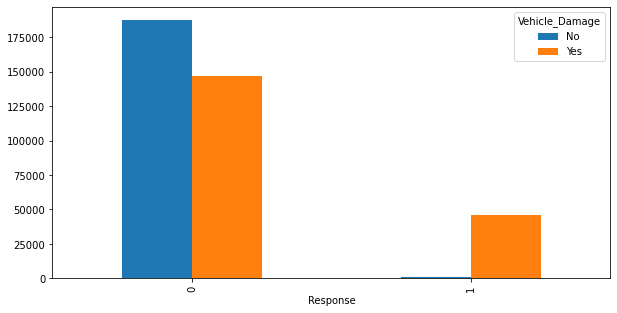

In [32]:
pd.crosstab(data['Response'], data['Vehicle_Damage']).plot(kind = 'bar', figsize = (10,5))
plt.show()

## Split the data into train and test, to avoid data leakage

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.utils import resample,shuffle
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [34]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [35]:
top_10_region = data['Region_Code'].value_counts()[:10].index
top_10_channel = data['Policy_Sales_Channel'].value_counts()[:10].index
data['Region_Code'] = data['Region_Code'].map(lambda x : x if x in top_10_region else 'others')
data['Policy_Sales_Channel'] = data['Policy_Sales_Channel'].map(lambda x : x if x in top_10_channel else 'others')

In [36]:
X= data.drop(['id','Response'], axis =1)
y= data['Response']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 10)
print(X_train.shape, X_test.shape)

(304887, 10) (76222, 10)


## One Hot Encoding the categorical variables

In [38]:
train = pd.get_dummies(data = X_train,columns=['Gender','Vehicle_Damage','Vehicle_Age', 'Region_Code', 'Policy_Sales_Channel'],drop_first = True)

test = pd.get_dummies(data = X_test,columns=['Gender','Vehicle_Damage','Vehicle_Age', 'Region_Code', 'Policy_Sales_Channel'],drop_first = True)

## Lets fit a base model of Logistic regression, calculate accuracy, auc_roc score and print classification report.

## What are your observations? Are the results satisfactory?

In [40]:
# Treat the class imbalance

sm = SMOTE()

In [41]:
X_rebal, y_rebal = sm.fit_resample(train, y_train)

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

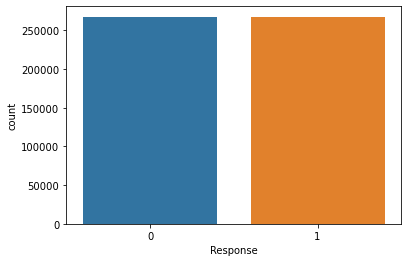

In [42]:
# Verify the oversampling is done and classes are balanced

sns.countplot(y_rebal)

In [44]:
# Train the model

lr = LogisticRegression()

In [45]:
lr.fit(X_rebal, y_rebal)
y_pred = lr.predict(test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     66887
           1       0.29      0.72      0.41      9335

    accuracy                           0.75     76222
   macro avg       0.62      0.74      0.62     76222
weighted avg       0.87      0.75      0.79     76222



## Check the results with Random Forest

In [46]:
rf = RandomForestClassifier()

In [47]:
rf.fit(X_rebal, y_rebal)
y_pred = rf.predict(test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     66887
           1       0.32      0.30      0.31      9335

    accuracy                           0.84     76222
   macro avg       0.61      0.61      0.61     76222
weighted avg       0.83      0.84      0.83     76222

